Scott Cole

6 May 2017

This notebook is to formalize the hypothesis that the neural response to a **very fast** movement in the preferred direction can be more similar to that of a movement in the **opposite** direction (perceptually: the wagon wheel effect).

The predicted neural response to a motion is computed by convolving the neural responses to static gratings

In [1]:
# Import libraries
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Define kernels of neuronal response to static gratings
The kernels plotted here represent the transient and sustained neural responses. (I believe these are firing rates in thalamic projection neurons in response to static gratings?)

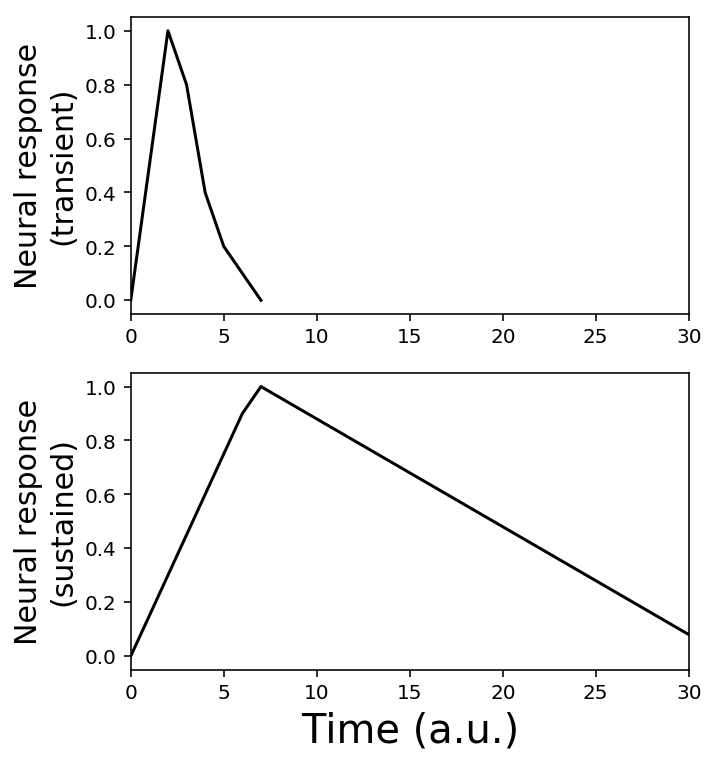

In [2]:
kernel_fast = np.array([0, .5, 1, .8, .4, .2, .1, 0])
kernel_slow = np.hstack([np.arange(0,1,.15),np.arange(1,0,-.04)])

plt.figure(figsize=(5,6))
plt.subplot(2,1,1)
plt.plot(kernel_fast,'k')
plt.xlim((0,30))
plt.ylabel('Neural response\n(transient)',size=15)
plt.subplot(2,1,2)
plt.plot(kernel_slow,'k')
plt.xlim((0,30))
plt.xlabel('Time (a.u.)',size=20)
plt.ylabel('Neural response\n(sustained)',size=15)

# 2. Estimate neural response to preferred and opposite directions

In the preferred direction, the stimulus that induces a sustained response occurs **before** the stimulus that induces a transient response

### Preferred direction

In [3]:
# Define times of sustained-response-inducing (slow)
# and transient-response-inducing (fast) stimuli
slow_event_time = 0
fast_event_time = 5

# Compute rasters of events
N = 60
slow_event_raster = np.zeros(N)
slow_event_raster[slow_event_time] = 1
fast_event_raster = np.zeros(N)
fast_event_raster[fast_event_time] = 1

# Compute trace of neural activity
slow_neural = np.convolve(slow_event_raster, kernel_slow, mode='full')
fast_neural = np.convolve(fast_event_raster, kernel_fast, mode='full')

neural_pref = np.copy(slow_neural)
neural_pref[:len(fast_neural)] += fast_neural

### Opposite direction

In [4]:
# Define times of sustained-response-inducing (slow)
# and transient-response-inducing (fast) stimuli
fast_event_time = 0
slow_event_time = 5

# Compute rasters of events
slow_event_raster = np.zeros(N)
slow_event_raster[slow_event_time] = 1
fast_event_raster = np.zeros(N)
fast_event_raster[fast_event_time] = 1

# Compute trace of neural activity
slow_neural = np.convolve(slow_event_raster, kernel_slow, mode='full')
fast_neural = np.convolve(fast_event_raster, kernel_fast, mode='full')

neural_opp = np.copy(slow_neural)
neural_opp[:len(fast_neural)] += fast_neural

NOTE:
Preferred direction movement: peaks of the transient and sustained responses align
Opposite direction movement: transient peak preceds sustained neural response


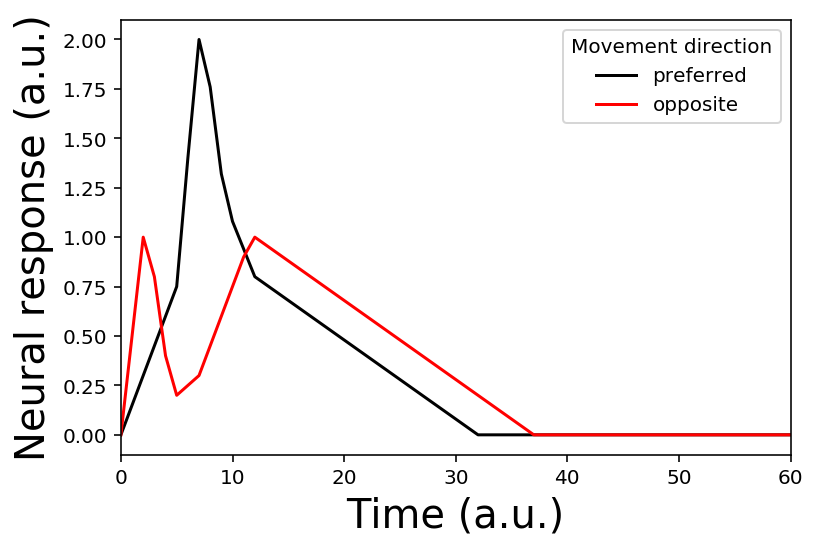

In [5]:
plt.plot(neural_pref,'k',label='preferred')
plt.plot(neural_opp,'r',label='opposite')
plt.legend(loc='best',title='Movement direction')
plt.xlabel('Time (a.u.)',size=20)
plt.ylabel('Neural response (a.u.)',size=20)
plt.xlim((0,N))

print('NOTE:')
print('Preferred direction movement: peaks of the transient and sustained responses align')
print('Opposite direction movement: transient peak preceds sustained neural response')

# 3. Estimate neural response to fast movement in the preferred direction

In [6]:
# Define times of sustained-response-inducing (slow)
# and transient-response-inducing (fast) stimuli
slow_event_time = 0
fast_event_time = 1

# Compute rasters of events
slow_event_raster = np.zeros(N)
slow_event_raster[slow_event_time] = 1
fast_event_raster = np.zeros(N)
fast_event_raster[fast_event_time] = 1

# Compute trace of neural activity
slow_neural = np.convolve(slow_event_raster, kernel_slow, mode='full')
fast_neural = np.convolve(fast_event_raster, kernel_fast, mode='full')

neural_pref_fast = np.copy(slow_neural)
neural_pref_fast[:len(fast_neural)] += fast_neural

NOTE:
The maximum of the neural response is decreased when the preferred motion is very fast


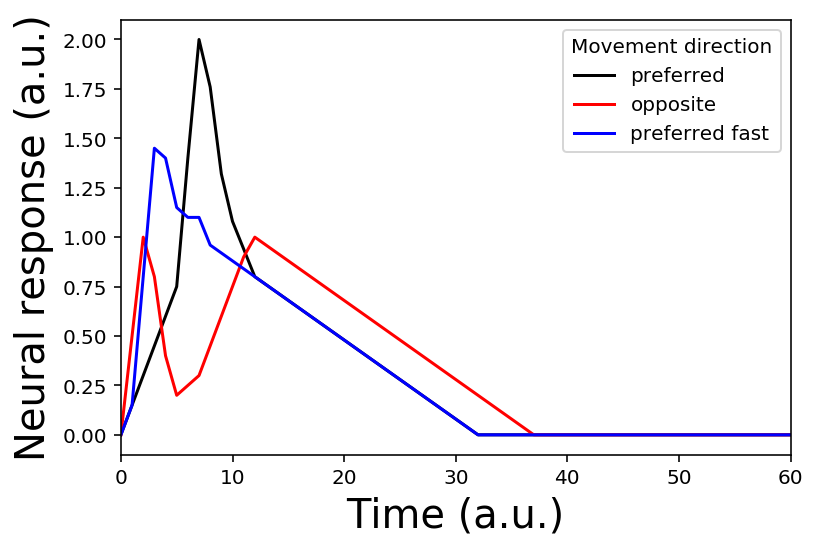

In [7]:
plt.plot(neural_pref,'k',label='preferred')
plt.plot(neural_opp,'r',label='opposite')
plt.plot(neural_pref_fast,'b',label='preferred fast')
plt.legend(loc='best',title='Movement direction')
plt.xlabel('Time (a.u.)',size=20)
plt.ylabel('Neural response (a.u.)',size=20)
plt.xlim((0,N))

print('NOTE:\nThe maximum of the neural response is decreased when the preferred motion is very fast')